# MNIST dataset

### loading important libraries

In [27]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import time

### importing the dataset

In [2]:
raw=pd.read_csv('digit_recogniser.csv')

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### viewing the top five rows of the dataset

In [4]:
raw.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### declaring independent and dependent variables and viewing counts of each label

In [5]:
y=raw['label'].values.reshape(-1,1)
x=raw.drop(['label'],axis=1).values

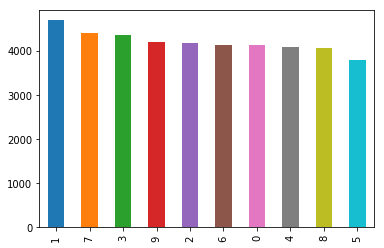

In [6]:
raw['label'].value_counts(dropna=False).plot.bar()

In [7]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
x.shape

(42000, 784)

In [9]:
y.shape

(42000, 1)

### viewing image of the dataset x[25000]

(-0.5, 27.5, 27.5, -0.5)

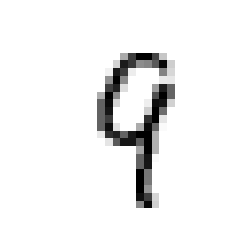

In [10]:
digit=x[25000]
digit_image= digit.reshape(28,28)
plt.imshow(digit_image,cmap=plt.cm.binary)
plt.axis('off')

### splitting data into two parts: train and test

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=24)

## model

### 1. logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\Golu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Golu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Golu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Golu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred= clf.predict(x_test)
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.914047619047619

### 2. KNearest neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier= KNeighborsClassifier(n_neighbors=13)
k_classifier.fit(x_train,y_train)

C:\Users\Golu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [47]:
k_pred=k_classifier.predict(x_test)
confusion_matrix(y_test,k_pred)
accuracy_score(y_test,k_pred)

0.9636904761904762

### applying hyperparamter tuning for KNearest  Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
grid_params= {
    'n_neighbors': [9,11,15,17,19] ,
    'weights' :['uniform', 'distance'] }

In [13]:
from sklearn.model_selection import GridSearchCV
gs= GridSearchCV(KNeighborsClassifier(), grid_params,cv=3, n_jobs=-1)
gs_results= gs.fit(x_train,y_train)

C:\Users\Golu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### results of hyperparameter tuning

In [14]:
gs_results.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [15]:
gs_results.best_score_

0.9592261904761905

In [16]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance')

### applying KNearest Neighbors with best parameter

In [28]:
score=[]
start=time.time()
gs_k_classifier = KNeighborsClassifier(n_neighbors=9, weights='distance')
gs_k_classifier.fit(x_train,y_train)
k_pred=gs_k_classifier.predict(x_test)
accuracy=accuracy_score(y_test,k_pred)
score.append(accuracy)
end=time.time()
print(classification_report(y_test,k_pred))
print(confusion_matrix(y_test,k_pred))
print("completion time" + str(end-start) + "seconds")

C:\Users\Golu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       818
           1       0.94      1.00      0.97       950
           2       0.99      0.95      0.97       843
           3       0.97      0.96      0.96       902
           4       0.99      0.96      0.97       820
           5       0.97      0.97      0.97       746
           6       0.97      0.99      0.98       814
           7       0.96      0.97      0.96       910
           8       0.98      0.92      0.95       746
           9       0.94      0.97      0.95       851

   micro avg       0.97      0.97      0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

[[814   0   0   0   0   0   2   0   0   2]
 [  0 948   1   0   0   0   1   0   0   0]
 [  7  10 798   2   1   0   3  19   2   1]
 [  0   4   4 866   0  12   0   3   7   6]
 [  0  11   0   0 784   0   3   2   0  20]
 [  1   2   0   8   1 723 

In [29]:
score

[0.9673809523809523]